In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from tools import * 
from MakeSyntheticSeismic import MakeSeismic, PlotSeis

In [124]:
samples = 5000
# Generating seismic examples
clean_signal, noise, noisy_signal = MakeSeismic(samples=samples)
clean_signal = clean_signal.reshape(samples+1,128,128,1)
noise = noise.reshape(samples+1,128,128,1)
noisy_signal = noisy_signal.reshape(samples+1,128,128,1)

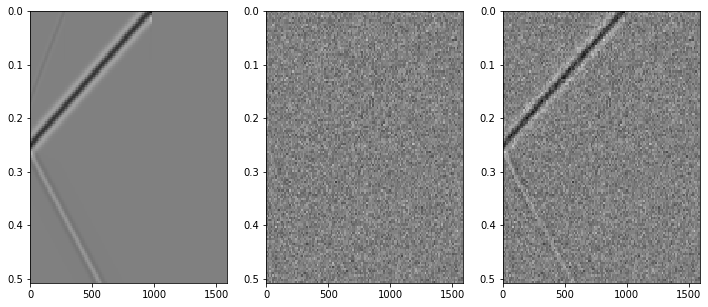

In [3]:
PlotSeis([clean_signal,noise,noisy_signal],num=10)

In [125]:
from sklearn.preprocessing import MinMaxScaler

In [126]:
#Scaling the data between 0 and 1 before it goes into the network
scalers_ns = {}
clean_signal_sc = np.zeros_like(clean_signal)
noisy_signal_sc = np.zeros_like(noisy_signal)
for i in range(clean_signal.shape[0]):
    scalers_ns[i] = MinMaxScaler(feature_range=(-1,1))
    # noisy_signal_sc[i, :, :, 0] = scalers_ns[i].fit_transform(noisy_signal[i, :, :, 0]) 
    noisy_signal_sc[i, :, :, 0] = noisy_signal[i,:,:,0] / np.max(np.abs(noisy_signal[i,:,:,0]))
    clean_signal_sc[i, :, :, 0] = clean_signal[i,:,:,0] / np.max(np.abs(clean_signal[i,:,:,0]))

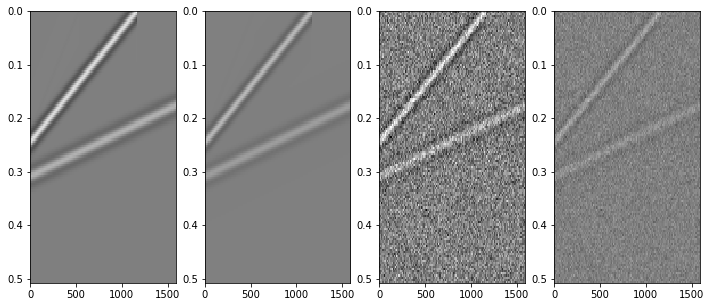

In [128]:
PlotSeis([clean_signal,clean_signal_sc,noisy_signal,noisy_signal_sc],num=4504)

In [129]:
from sklearn.model_selection import train_test_split

In [130]:
NS_train, NS_test, S_train, S_test = train_test_split(noisy_signal_sc,clean_signal_sc, test_size=0.33, random_state = 21)
NS_train_nosc, NS_test_nosc, S_train_nosc, S_test_nosc = train_test_split(noisy_signal,clean_signal, test_size=0.33, random_state = 21)

In [131]:
from ModelGenSeis import autoencoder

In [132]:
from tensorflow import reduce_mean
from tensorflow.image import ssim
# Custom loss functions

# y_true = target = clean image = X_train
# y_pred = clean output

# max structural similarity index between original image and denoised imaged 
def ssim_loss(y_true, y_pred):
  return 1-reduce_mean(ssim(y_true, y_pred, 1.0, filter_size=5))

In [133]:
# modelUnet = autoencoder("Unet",start_filters=8)
modelUnetMSE = autoencoder("Unet_NoSc",start_filters=8)
# modelUnetBCE = autoencoder("Unet",start_filters=8)
# modelUpSc = autoencoder("upsc")
# modelUnetNoSc = autoencoder("Unet_NoSc",start_filters=8)

In [134]:
# modelUnet.compile(loss=ssim_loss,optimizer='adam',metrics=[ssim_loss])
# modelUnetMSE.compile(loss='mse',optimizer='adam')
# modelUpSc.compile(loss=ssim_loss,optimizer='adam',metrics=[ssim_loss])
modelUnetNoSc.compile(loss=ssim_loss,optimizer='adam',metrics=[ssim_loss])
modelUnetMSE.compile(loss='mse',optimizer='adam')
modelUnetBCE.compile(loss='binary_crossentropy',optimizer='adam')

In [112]:
batch_size = 128
epochs = 10

In [94]:
# modelUnet_hist = modelUnet.fit(NS_train, S_train, batch_size = batch_size, epochs = epochs,shuffle=True,validation_data =(NS_test,S_test),use_multiprocessing=True)

In [100]:
# modelUnetNoSc_hist = modelUnet.fit(NS_train_nosc, S_train_nosc, batch_size = batch_size, epochs = epochs,shuffle=True,validation_data =(NS_test_nosc,S_test_nosc),use_multiprocessing=True)

In [113]:
modelUnetMSE_hist = modelUnetMSE.fit(NS_train_nosc, S_train_nosc, batch_size = batch_size, epochs = epochs,shuffle=True,validation_data =(NS_test_nosc,S_test_nosc),use_multiprocessing=True)

Epoch 1/10
6/6 [==============================] - 24s 4s/step - loss: 0.0506 - val_loss: 0.0444
Epoch 2/10
6/6 [==============================] - 24s 4s/step - loss: 0.0446 - val_loss: 0.0380
Epoch 3/10
6/6 [==============================] - 24s 4s/step - loss: 0.0402 - val_loss: 0.0333
Epoch 4/10
6/6 [==============================] - 24s 4s/step - loss: 0.0368 - val_loss: 0.0308
Epoch 5/10
6/6 [==============================] - 24s 4s/step - loss: 0.0341 - val_loss: 0.0277
Epoch 6/10
6/6 [==============================] - 24s 4s/step - loss: 0.0315 - val_loss: 0.0252
Epoch 7/10
6/6 [==============================] - 23s 4s/step - loss: 0.0283 - val_loss: 0.0222
Epoch 8/10
6/6 [==============================] - 23s 4s/step - loss: 0.0250 - val_loss: 0.0187
Epoch 9/10
6/6 [==============================] - 24s 4s/step - loss: 0.0218 - val_loss: 0.0163
Epoch 10/10
6/6 [==============================] - 23s 4s/step - loss: 0.0192 - val_loss: 0.0136


In [102]:
# modelUnetBCE_hist = modelUnetBCE.fit(NS_train_nosc, S_train_nosc, batch_size = batch_size, epochs = epochs,shuffle=True,validation_data =(NS_test_nosc,S_test_nosc),use_multiprocessing=True)

Epoch 1/10
6/6 [==============================] - 25s 4s/step - loss: 0.0301 - val_loss: -0.0861
Epoch 2/10
6/6 [==============================] - 24s 4s/step - loss: -0.0682 - val_loss: -0.1891
Epoch 3/10
6/6 [==============================] - 24s 4s/step - loss: -0.1456 - val_loss: -0.2573
Epoch 4/10
6/6 [==============================] - 24s 4s/step - loss: -0.2058 - val_loss: -0.2882
Epoch 5/10
6/6 [==============================] - 24s 4s/step - loss: -0.2485 - val_loss: -0.3109
Epoch 6/10
6/6 [==============================] - 24s 4s/step - loss: -0.2815 - val_loss: -0.3244
Epoch 7/10
6/6 [==============================] - 24s 4s/step - loss: -0.3002 - val_loss: -0.3378
Epoch 8/10
6/6 [==============================] - 24s 4s/step - loss: -0.3207 - val_loss: -0.3510
Epoch 9/10
6/6 [==============================] - 24s 4s/step - loss: -0.3337 - val_loss: -0.3589
Epoch 10/10
6/6 [==============================] - 24s 4s/step - loss: -0.3450 - val_loss: -0.3683


In [65]:
# batch_size = 128
# epochs = 50
# modelUpSc_hist = modelUpSc.fit(ns_train, s_train, batch_size = batch_size, epochs = epochs,shuffle=True,validation_data =(ns_test,s_test),use_multiprocessing=True)

In [66]:
# modelUnet.save('./models/Unet_1')

In [87]:
hists = pd.DataFrame(modelUnet_hist.history)
hists["model"] = 'Unet'

histUnetNoSc = pd.DataFrame(modelUnetNoSc_hist.history)
hists = store_hist(hists,histUnetNoSc,'Unet_nosc')

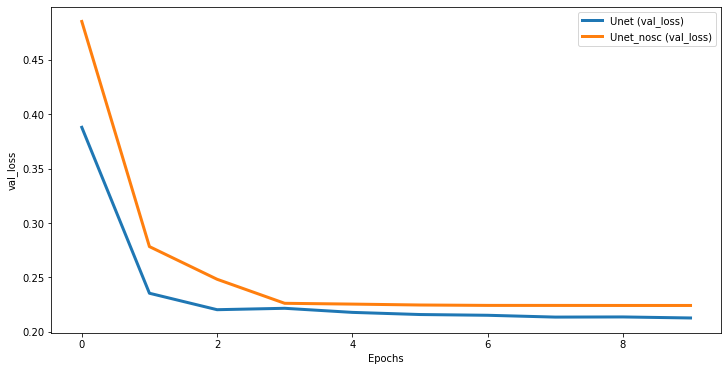

In [123]:
plot_perf(hists,models=['Unet','Unet_nosc'],metrics=['val_loss'])

In [114]:
# pred = modelUnet.predict(NS_test)
# pred2 = modelUnet.predict(ns_test)
# predmse = modelUnetMSE.predict(NS_test_nosc)
predmse2 = modelUnetMSE.predict(NS_test_nosc)

# pred_upsc = modelUpSc.predict(ns_test)
# pred_nosc = modelUnetNoSc.predict(NS_test_nosc)

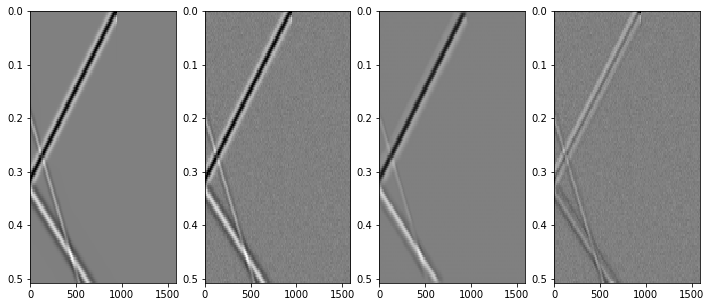

In [121]:
PlotSeis([S_test_nosc,NS_test_nosc,predmse,NS_test_nosc-predmse],num=51)

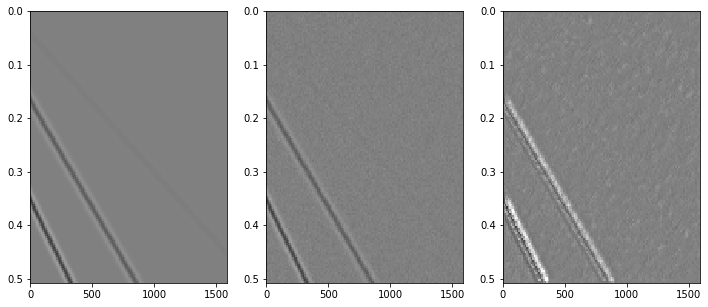

In [119]:
PlotSeis([S_test,NS_test,pred_nosc*10],num=100)